# Aviation Data Analysis Notebook
*By Keith Tongi*

#### This analysis is aimed at gaining insights and understanding the aviation business safety record in the United States and International Waters. My aim is to provide business recommendations to a client to improve their safety record.

In [63]:
# Step 1: Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm 

In [64]:
# Step 2: Load the dataset
df = pd.read_csv("AviationData.csv", encoding='latin1')

C:\Users\HP\AppData\Local\Temp\ipykernel_11360\3557095961.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding='latin1')


In [65]:
# Step 3: Confirming shape of the dataset
df.shape

(88889, 31)

In [66]:
# Step 4: Checking the head and tail of data
df.head()
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [67]:
# Step 5: List of data's columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [68]:
# Step 6: Statistical summary of columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# Cleaning the Data 

In [69]:
# Step 1: Checking the number of missing values in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [70]:
# Step 2: There's a lot of missing data, whith will certainly skew my findings. I am, therefore, going to drop columns that have more than 25% of their data missing. I will also drop columns which are unnecessary for my analysis.
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Broad.phase.of.flight', 'Accident.Number', 'Registration.Number', 'Amateur.Built', 
                   'Publication.Date', 'Publication.Date', 'Report.Status','Engine.Type']

df_clean = df.drop(columns=columns_to_drop)

In [71]:
# Step 3: Confirming remaining columns
df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition'],
      dtype='object')

In [72]:
# Step 4: I will now change some column titles to versions that are more readable.
new_column_names = {'Event.Id': 'ID', 'Investigation.Type': 'Type', 'Event.Date':'Date', 'Injury.Severity':'Injury_Severity', 
                    'Aircraft.damage':'Damage_Type', 'Number.of.Engines':'Engines', 'Purpose.of.flight':'Flight_Purpose',
                    'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
                   'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',}
df_clean.rename(columns=new_column_names, inplace=True)

In [73]:
# Step 5: Confirming the new column names
df_clean.head(1)

,ID,Type,Date,Location,Country,Injury_Severity,Damage_Type,Make,Model,Engines,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK


In [74]:
# Step 6: Changing date type to the appropriate format and creating a column for seasons
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%Y-%m-%d')
df_clean['Month'] = df_clean['Date'].dt.month
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df_clean['Season'] = df_clean['Month'].map(seasons)

In [75]:
# Step 7: Upon revision, I am going to create more columns out of Date columns for visualisations.
df_clean['Year'] = df_clean['Date'].dt.year

In [76]:
# Step 8: The United States accounts for more than 90% of the Country column. To make work easy, I will focus solely on this jurisdiction.
df_clean['Country'].value_counts()
df_us = df_us = df_clean[df_clean['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

In [77]:
# This is to prevent warning messages that I am getting in the next step.
df_us = df_us.copy()

In [78]:
# Step 9: Upon revision, I will create a list of US states by code for future geographical visualisations. 
valid_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]
def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        if last_two_chars in valid_state_codes:
            return location[:-3].strip(), last_two_chars
        else:
            return location, "Not Applicable" # Factoring in the fact that some states have had no accidents.
    else:
        return np.nan, np.nan

df_us[['City', 'State']] = df_us['Location'].apply(extract_city_state).apply(pd.Series)


In [79]:
# getting rid of trailing commas in City column observed in the data
df_us['City'] = df_us['City'].str.rstrip(',')

In [80]:
# Step 10: Having divided Location and Date columns, I will now drop the original columns.
df_us.drop(columns=['Date', 'Location'], inplace=True)

In [81]:
# Now my dataframe is ready for further analysis. There are still some missing data but I believe this is not 
# significant to impact my analysis
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82248 entries, 0 to 82247
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                82248 non-null  object 
 1   Type              82248 non-null  object 
 2   Country           82248 non-null  object 
 3   Injury_Severity   82140 non-null  object 
 4   Damage_Type       80269 non-null  object 
 5   Make              82227 non-null  object 
 6   Model             82210 non-null  object 
 7   Engines           80373 non-null  float64
 8   Flight_Purpose    79819 non-null  object 
 9   Fatal_Injuries    71594 non-null  float64
 10  Serious_Injuries  70873 non-null  float64
 11  Minor_Injuries    71519 non-null  float64
 12  Uninjured         77243 non-null  float64
 13  Weather           81603 non-null  object 
 14  Month             82248 non-null  int32  
 15  Season            82248 non-null  object 
 16  Year              82248 non-null  int32 

# Conducting Exploratory Data Analysis (EDA) and Visualizations

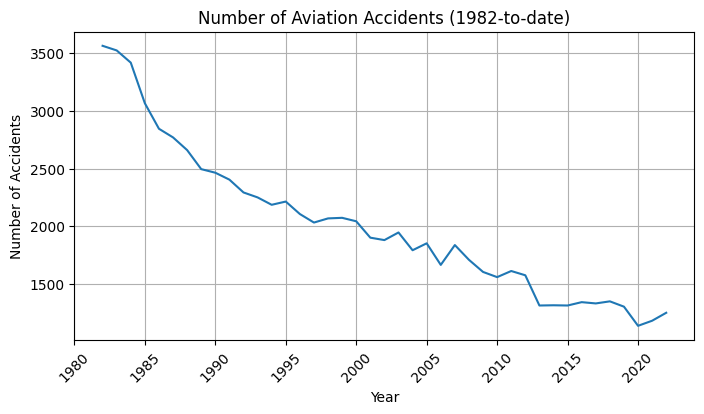

In [82]:
# Step 1: I will now have a look at a line plot of US aviation accidents over the years. I will start in 1982 on account of the fact that the data is not complete before this year. I will also drop the years with no accidents.
years_with_accidents = df_us['Year'].value_counts().index

df_us_filtered = df_us[df_us['Year'] >= 1982]
accidents_by_year = df_us_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents (1982-to-date)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

It is clear that there has been an overall decrease in the number of accidents. This points to great improvements in safety within the sector.

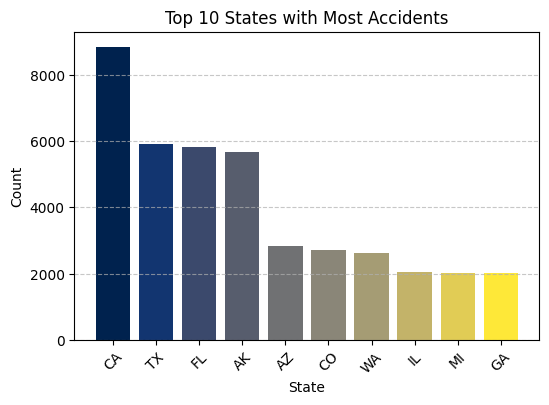

In [83]:
# Step 2: I will now take a look at top ten states with most accidents 
top_10_states = df_us['State'].value_counts().head(10)

import matplotlib
cmap = matplotlib.colormaps.get_cmap('cividis').resampled(len(top_10_states))
colors = cmap(range(len(top_10_states)))


plt.figure(figsize=(6, 4))
bars = plt.bar(top_10_states.index, top_10_states.values, color=colors)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From this chart, we can see California, Texas, Florida and Arkansas have the most aviation accidents.

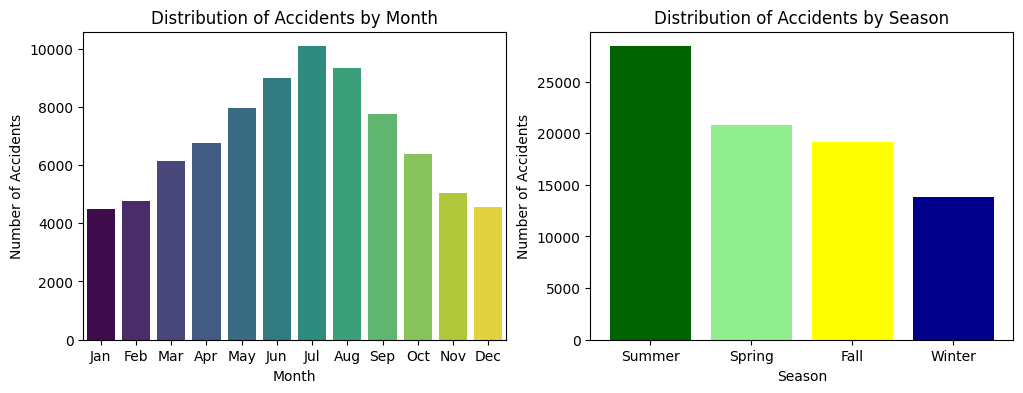

In [84]:
# Step 3: Plot distribution of accidents by months and seasons
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df_us, x='Month', hue='Month', palette='viridis', ax=axes[0], legend=False)
axes[0].set_title('Distribution of Accidents by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Accidents')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(month_order)

season_colors = {
    'Winter': 'darkblue',
    'Spring': 'lightgreen',
    'Summer': 'darkgreen',
    'Fall': 'yellow'
}

seasonal_accident_counts = df_us['Season'].value_counts()

axes[1].bar(seasonal_accident_counts.index, seasonal_accident_counts, color=[season_colors.get(season, 'gray') for season in seasonal_accident_counts.index])
axes[1].set_title('Distribution of Accidents by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Accidents')
plt.show()

Most accidents happen in the months of June, July and August. Summer months. 

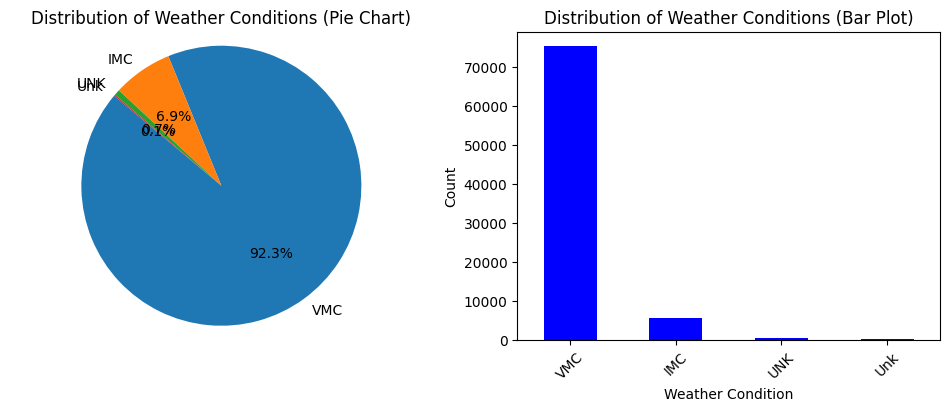

In [85]:
# Step 4: Exploring whether there is a relationship between wheather condition and accidents.

weather_counts_updated = df_us['Weather'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].pie(weather_counts_updated, labels=weather_counts_updated.index,autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Weather Conditions (Pie Chart)')
axes[0].axis('equal')  

weather_counts_updated.plot(kind='bar', color='blue', ax=axes[1])
axes[1].set_title('Distribution of Weather Conditions (Bar Plot)')
axes[1].set_xlabel('Weather Condition')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

Most accidents happen in  Visual Meteorological Conditions (VMC) which has better visibility. My assumption is that more flights occur at this time because the weather is good.

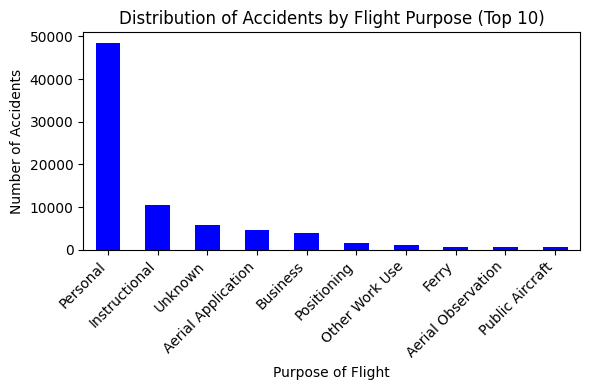

In [86]:
# Step 5: Exploring the purpose of flights that get involved in accidents.
top_10_purposes = df_us['Flight_Purpose'].value_counts().nlargest(10).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
top_10_purposes.plot(kind='bar', color='blue')
plt.title('Distribution of Accidents by Flight Purpose (Top 10)')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

Personal flights are responsible for a significant majority of aviation accidents.

In [87]:
# Step 6: Next, I will find out what plane Makes and Models are accident prone 
make_model_accident_counts = df_us.groupby(['Make', 'Model']).size().reset_index(name='AccidentCount', drop=False)
make_model_accident_counts = make_model_accident_counts.sort_values(by='AccidentCount', ascending=False)
make_model_accident_counts

,Make,Model,AccidentCount
5095,Cessna,152,2149
5117,Cessna,172,1225
5160,Cessna,172N,980
13939,Piper,PA-28-140,798
5070,Cessna,150,709
...,...,...,...
18743,Zenith,CH650LS,1
18741,Zenith,601HDS,1
3923,Bradley,Midget Mustang,1
18739,Zenair Zodiac,601HDS,1


Cessna planes constituted of 4/5 of plane models involved in most accidents.

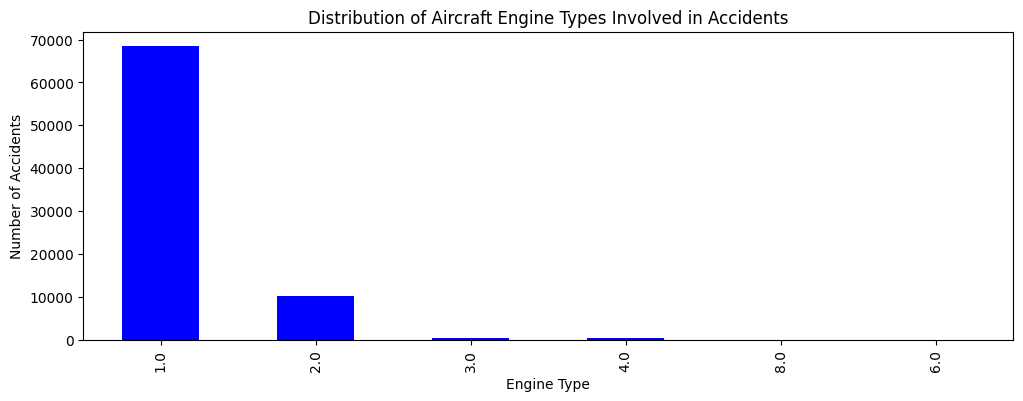

In [88]:
# Step 7: I will explore what plane engine type is accident prone.
# My chart had a lot of 0 values. I will replace them with NaN to make it easier to visualise since there's no plane with zero engines.
df_us['Engines'] = df_us['Engines'].replace(0.0, np.nan)

# Count the number of accidents for each engine type
Engine_Types = df_us['Engines'].value_counts()

plt.figure(figsize=(12, 4))
Engine_Types.plot(kind='bar', color='blue')
plt.title('Distribution of Aircraft Engine Types Involved in Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Engine Type')
plt.xticks(rotation=90)

plt.show()

Planes with single engines were responsible for a notable majority of accidents.

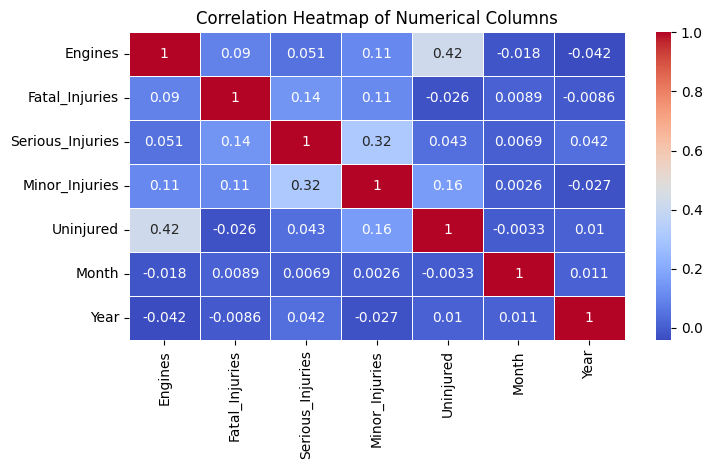

In [89]:
# Step 8: Next, we will do a correlation heatmap of numerical values. The closer the correlation coefficient is to 1 or -1, the stronger the correlation. 
numerical_data = df_us.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [35]:
# Step 9: Saving the cleaned dataset to a new CSV file
df.to_csv("Cleaned_AviationData.csv", index=False)

There are negative correlation between numerical columns.  

# Conclusion and Recommendations

#### From the analysis above, it is encouraging to observe a general decline in aviation accidents both within the United States and in international airspace. However, several areas for improvement have emerged, which inform the following strategic recommendations for the client:

1. **Geographic Risk Concentration**:  
   States such as California, Texas, Florida, and Arizona consistently report the highest number of aviation accidents. This trend may be influenced by higher air traffic volumes driven by greater wealth and more favorable flying conditions. Nonetheless, this concentration presents an opportunity to implement targeted safety interventions. I recommend reinforcing region-specific safety protocols and investing in continuous pilot training and compliance audits in these high-traffic states.

2. **Risk Profile of Personal Flights**:  
   Personal flights account for the overwhelming majority of aviation accidents, nearly 50,000 according to the analysis. This underscores the need for more stringent requirements for private pilots. I recommend advocating for stricter licensing standards, mandatory recurrent training, and perhaps the development of risk-scoring systems for personal flight operations to flag high-risk behaviors early.

3. **Aircraft Type and Engine Considerations**:  
   The Cessna brand dominates the list of aircraft models most frequently involved in accidents, comprising four out of the top five models. Additionally, single-engine planes are disproportionately represented in accident statistics. The client should consider diversifying their fleet to include more multi-engine aircraft with stronger safety records. For existing fleets, I recommend working closely with manufacturers to implement safety retrofits and updates, alongside enhanced maintenance protocols and operator training.